In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from deepsudoku import REPO_PATH
import json

os.chdir(REPO_PATH)

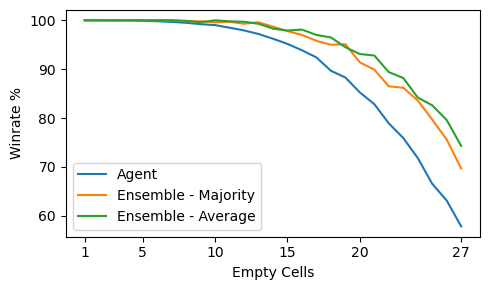

In [5]:
normal_model = pd.read_json("stats/winrate_against_missing_digits_10000_games.json", typ = "Series")
ensemble_average = pd.read_json("stats/winrate_against_missing_digits_ensemble_average_small_1000_games.json", typ = "Series")
ensemble_majority = pd.read_json("stats/winrate_against_missing_digits_ensemble_majority_small_1000_games.json", typ = "Series")

x = np.arange(1, 28)
plt.figure(figsize=(5,3))

plt.plot(x, normal_model.values * 100, label = "Agent")
plt.plot(x, ensemble_majority.values * 100, label = "Ensemble - Majority")
plt.plot(x, ensemble_average.values * 100, label = "Ensemble - Average")

plt.ylabel("Winrate %")
plt.xlabel("Empty Cells")

ticks = [1,5,10,15,20,27]
plt.xticks(ticks, ticks)
plt.legend()
plt.tight_layout()
plt.savefig("imgs/rl_final_performance.jpg", bbox_inches='tight', dpi=300)
plt.show()

In [6]:
with open("stats/winrate_easy_10000_games.json","r") as f:
    winrate = json.load(f) 
print(winrate)

{'10000': 0.5734}


In [10]:
ensemble_average.loc[27],ensemble_majority.loc[27]

(0.743, 0.6970000000000001)

In [14]:
ensembles = pd.read_csv("stats/ensemble_average_1000_games.csv", index_col= 0)
ensembles = pd.concat((pd.DataFrame([[0.5734, 1, 1 , None, 10000]], columns= ensembles.columns),ensembles, ))
ensembles

,winrate,n_votes,n_pertubations,mode,games
0,0.7480,10.0,10.0,average,1000
1,0.7540,10.0,20.0,average,1000
2,0.7720,10.0,50.0,average,1000
3,0.7660,20.0,10.0,average,1000
4,0.7840,50.0,10.0,average,1000
0,0.5734,1.0,1.0,None,10000
